# Result Figures

This notebook provides figures summarizing our the properties of our classified targets.

In [1]:
import sys

import sncosmo
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator

sys.path.insert(0, '../')
from analysis_pipeline import SN91bgSource
from read_pipeline_outputs import get_fit_results



## Load Data

We begin by reading in SNCosmo fit results for SDSS, DES, and CSP. This includes fits that use all observed bands, along with those that exclusively use the restframe blue and restframe red filters.

In [2]:
data_dir = '../pipeline_outputs'
salt_2_4 = sncosmo.Model(source=sncosmo.get_source('salt2', version='2.4'))
salt_2_0 = sncosmo.Model(source=sncosmo.get_source('salt2', version='2.0'))
sn_91bg = sncosmo.Model(source=SN91bgSource())

for survey in ('sdss', 'csp', 'des'):
    for model in (salt_2_0, salt_2_4, sn_91bg):
        for param_num in (4, 5):
            var_pattern = f'{survey}_{model.source.name}_{model.source.version}_{param_num}p_{{}}'
            var_pattern = var_pattern.replace('.', '_')
            all_bands, blue, red = get_fit_results(survey, model, param_num, data_dir)
            
            for var, string in [(all_bands, 'all'), (blue, 'blue'), (red, 'red')]:
                if var is not None:
                    print('Defining:', var_pattern.format(string))
                    globals()[var_pattern.format(string)] = var


Defining: sdss_salt2_2_0_4p_all
Defining: sdss_salt2_2_4_4p_all
Defining: sdss_salt2_2_4_4p_blue
Defining: sdss_salt2_2_4_4p_red
Defining: sdss_salt2_2_4_5p_all
Defining: sdss_salt2_2_4_5p_blue
Defining: sdss_salt2_2_4_5p_red
Defining: sdss_sn91bg_color_interpolation_4p_all
Defining: sdss_sn91bg_color_interpolation_4p_blue
Defining: sdss_sn91bg_color_interpolation_4p_red
Defining: sdss_sn91bg_color_interpolation_5p_all
Defining: sdss_sn91bg_color_interpolation_5p_blue
Defining: sdss_sn91bg_color_interpolation_5p_red
Defining: csp_salt2_2_4_4p_all
Defining: csp_salt2_2_4_4p_blue
Defining: csp_salt2_2_4_4p_red
Defining: csp_salt2_2_4_5p_all
Defining: csp_salt2_2_4_5p_blue
Defining: csp_salt2_2_4_5p_red
Defining: csp_sn91bg_color_interpolation_4p_all
Defining: csp_sn91bg_color_interpolation_4p_blue
Defining: csp_sn91bg_color_interpolation_4p_red
Defining: csp_sn91bg_color_interpolation_5p_all
Defining: csp_sn91bg_color_interpolation_5p_blue
Defining: csp_sn91bg_color_interpolation_5p_red


#  $M(B)$ VS. $\Delta M_{15}(B)$

In [3]:
def plot_decline_rate(path, show=True):
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.scatter(
        x=sdss_salt2_2_4_4p_all['delta_15'], 
        y=sdss_salt2_2_4_4p_all['b_max'],
        label='CSP',
        s=1,
    )

    plt.scatter(
        x=des_salt2_2_4_4p_all['delta_15'], 
        y=des_salt2_2_4_4p_all['b_max'],
        label='DES',
        s=1,
    )

    plt.scatter(
        x=csp_salt2_2_4_4p_all['delta_15'], 
        y=csp_salt2_2_4_4p_all['b_max'],
        label='CSP',
        s=1,
    )

    ax.set_xlim(0, 3.5)
    ax.set_xlabel(r'$\Delta M_{15}\, (B)$', fontsize=14, labelpad=10)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))

    ax.set_ylim(-10, -30)
    ax.set_ylabel(r'$M\, (B)$', fontsize=14, labelpad=10)
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))

    plt.savefig(path)
    if show:
        plt.show()

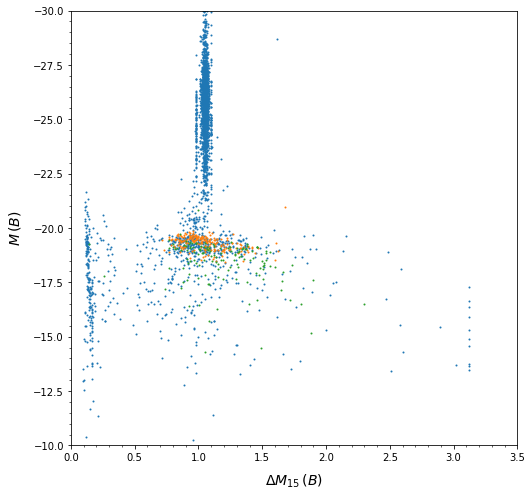

In [4]:
plot_decline_rate('notebook_figs/ia_decline_rate.pdf')

# Stretch and Color

In [5]:
def plot_stretch_color(path, show=True):
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.scatter(
        x=sdss_salt2_2_4_4p_all['x1'], 
        y=sdss_salt2_2_4_4p_all['c'],
        label='CSP',
        s=1,
    )

    plt.scatter(
        x=des_salt2_2_4_4p_all['x1'], 
        y=des_salt2_2_4_4p_all['c'],
        label='DES',
        s=1,
    )

    plt.scatter(
        x=csp_salt2_2_4_4p_all['x1'], 
        y=csp_salt2_2_4_4p_all['c'],
        label='CSP',
        s=1,
    )

    ax.set_xlabel(r'Stretch $(x_1)$', fontsize=14, labelpad=10)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))

    #ax.set_ylim(-10, -30)
    ax.set_ylabel(r'Color $(c)$', fontsize=14, labelpad=10)
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))

    plt.savefig(path)
    if show:
        plt.show()


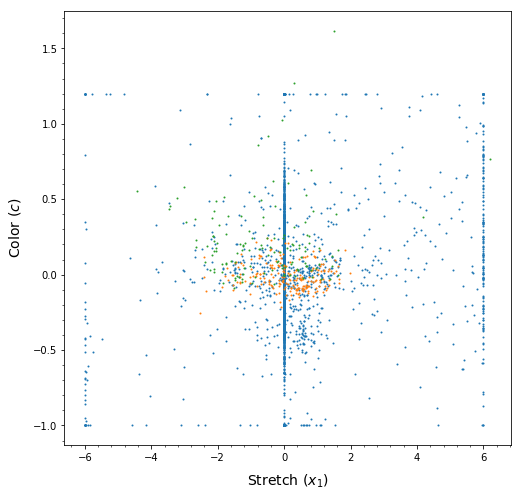

In [6]:
plot_stretch_color('notebook_figs/ia_stretch_color.pdf')